<p>Final Examination<p>
<p>Submission:final_exam_lastname
eg. final_exams_debrah</p>
<h4>Working with financial Data</h4>


In [107]:
#Investors are curious to know if there is any relationship between
#stocks. They will specifically would like to 
#understand this relationship so they can plan
#their investment portfolio
#As a data analyst perform a statistically analysis
#for two stock of your choosing. 
#Kindly account for the following:
#1. Correlation between the two stocks
#2. A full linear regression analysis between the two stocks
#3. Use the linear regression equation to make predictions and account for percentage difference
#4. Any visualization that will help with understanding the trends and changes in both stocks over time
    #Set up the code so that it is generic and can show the trend for any stock 
#5. You can use the two examples in class an a guide for this finals. 
#6. Do not use any of the stocks that was used in class. Kindly research on the tickers(stock names of other companies)

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import yfinance as yfin
import statsmodels.api as sm

In [109]:
stocks = "TSLA F".split()

start = dt.date.today() - dt.timedelta(365)

In [110]:
data = yfin.download(stocks, start)['Close']
data.head()

[*********************100%***********************]  2 of 2 completed


Ticker,F,TSLA
Date,,
2023-12-14,12.08,251.050003
2023-12-15,12.02,253.500000
2023-12-18,11.93,252.080002
2023-12-19,12.02,257.220001
2023-12-20,11.80,247.139999


In [111]:
returns = np.log(data)
returns.head()

Ticker,F,TSLA
Date,,
2023-12-14,2.491551,5.525652
2023-12-15,2.486572,5.535364
2023-12-18,2.479056,5.529747
2023-12-19,2.486572,5.549932
2023-12-20,2.468100,5.509955


In [112]:
stock_sample = returns.corr()
stock_sample

Ticker,F,TSLA
Ticker,,
F,1.000000,-0.432929
TSLA,-0.432929,1.000000


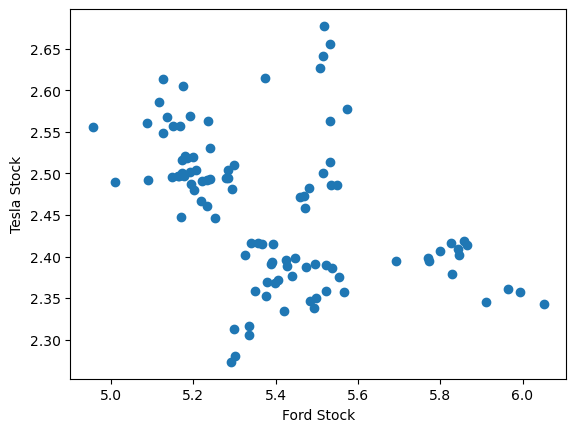

In [113]:
stock_sample = returns.sample(100)
plt.scatter(x=stock_sample['TSLA'], y=stock_sample['F'])
plt.ylabel('Tesla Stock')
plt.xlabel('Ford Stock')
plt.show()

In [114]:
linear_reg = np.polyfit(stock_sample['TSLA'], stock_sample['F'], deg=1)
linear_reg

array([-0.15946061,  3.3164717 ])

In [115]:
trend = np.polyval(linear_reg, stock_sample['TSLA'])

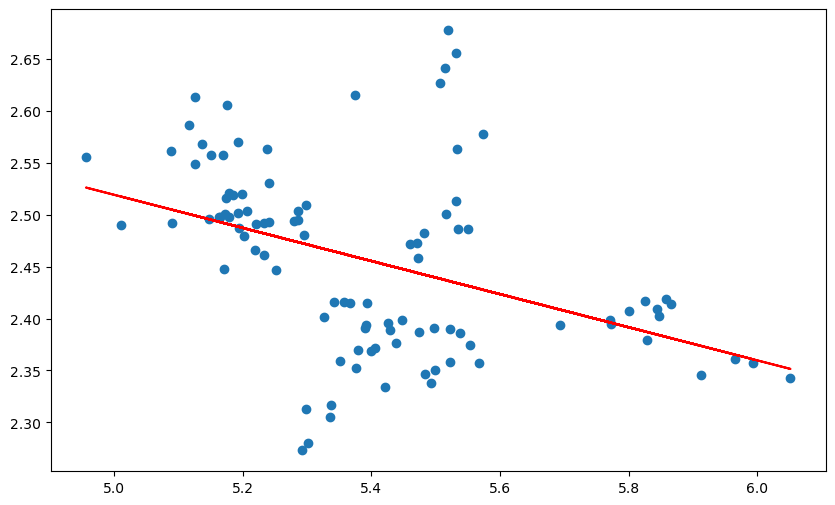

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(stock_sample['TSLA'], stock_sample['F'])
plt.plot(stock_sample['TSLA'], trend, 'r')
plt.show()

In [117]:
Tesla_Data = pd.DataFrame(yfin.download('TSLA', start))
Tesla_Data = Tesla_Data.sample(100)

time = np.arange(1, len(Tesla_Data) + 1)
Tesla_Data['time'] = time

Tesla_Data = Tesla_Data[['time', 'Close']]
Tesla_Data['Close'] = round(Tesla_Data['Close'], 2)

Tesla_Data.head(10)


[*********************100%***********************]  1 of 1 completed


Price,time,Close
Ticker,,TSLA
Date,,
2024-06-26,1,196.37
2023-12-19,2,257.22
2024-01-05,3,237.49
2024-08-14,4,201.38
2024-06-21,5,183.01
2024-10-01,6,258.02
2024-04-10,7,171.76
2024-03-15,8,163.57


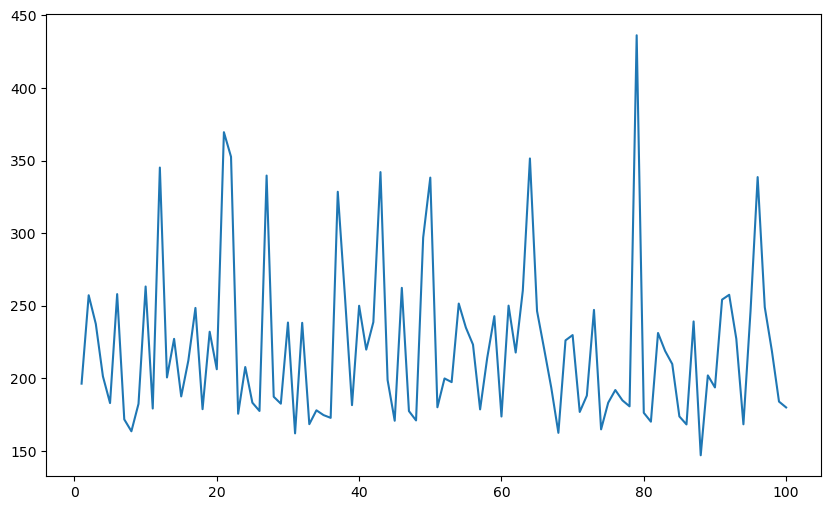

In [118]:
plt.figure(figsize=(10,6))
plt.plot(Tesla_Data['time'], Tesla_Data['Close'], label = "Alphabet stock")

In [119]:
x_time = [5,7,12,16,20]
y_mass = [40,120,180,210,240]

mass_time = pd.DataFrame({
    "time":x_time,
    "mass":y_mass})

In [120]:
corrMatrix = mass_time.corr()
corrMatrix

,time,mass
time,1.000000,0.952816
mass,0.952816,1.000000


In [121]:
X= mass_time['time']
Y= mass_time['mass']

X=sm.add_constant(X)

reg_model = sm.OLS(Y,X).fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mass   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     29.56
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0122
Time:                        21:17:28   Log-Likelihood:                -22.454
No. Observations:                   5   AIC:                             48.91
Df Residuals:                       3   BIC:                             48.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5065     29.687      0.388      0.7

C:\Users\domkr\AppData\Roaming\jupyterlab-desktop\envs\env_1\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


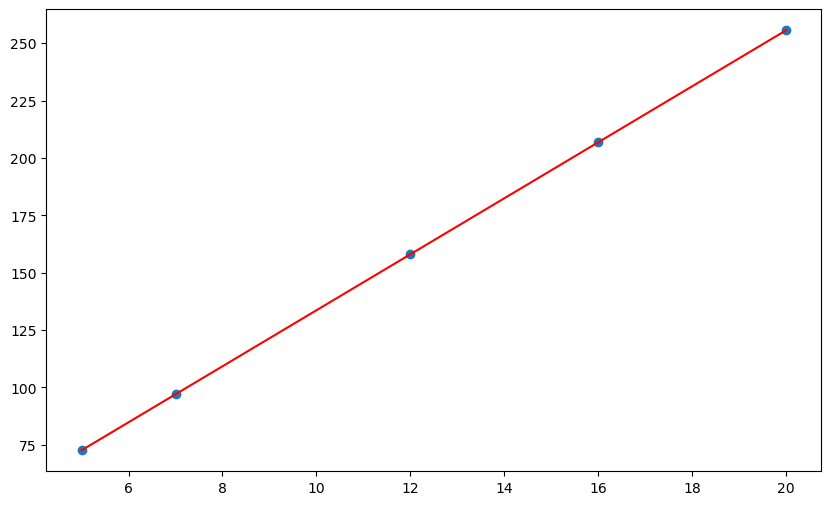

In [122]:
y_hat= reg_model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X['time'], y_hat, label = 'Data Points')
plt.plot(X['time'], y_hat, color='red', label='Fitted Line')

In [124]:
time_value = float(input("Enter a value for Time to predict: "))

y_hat = 11.506 + 12.208 * time_value

print(f'The mass value of {round(time_value,3)}minutes is {y_hat} grams')

Enter a value for Time to predict:  10


The mass value of 10.0minutes is 133.586 grams
